# Index Plot Gallery

Index plots are used for comparing different categories or segments against a baseline or average value, typically set at 100. They're ideal for retail analytics to identify which categories over- or underperform relative to the average.

Index plots excel at:
- **Performance Comparison**: Compare sales performance across product categories or regions against a baseline
- **Segment Analysis**: Analyze customer segments against overall average behavior  
- **Benchmarking**: Evaluate stores or regions relative to company-wide metrics
- **Opportunity Identification**: Highlight high-potential areas for growth or investment

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pyretailscience.plots import index

## Basic Index Plot

Create a basic index plot using default aggregation function (`agg_func="sum"`) and sorting by group.

---

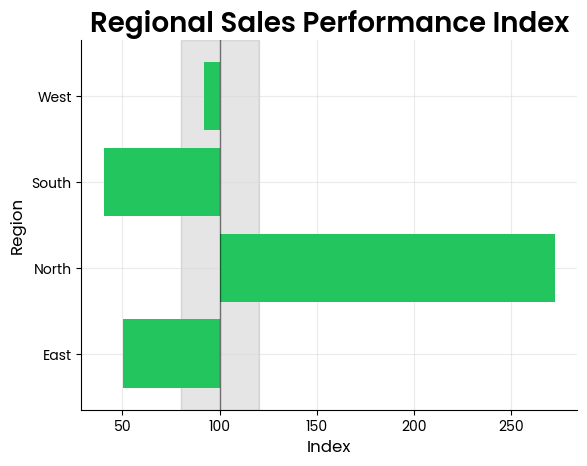

In [ ]:
# Create sample sales data that guarantees bars outside 80-120 range
sales_data = pd.DataFrame(
    {
        "product_category": (["Electronics"] * 20 + ["Apparel"] * 20 + ["Home"] * 20 + ["Sports"] * 20),
        "region": ["North", "South", "East", "West"] * 20,
        "sales_amount": (
            [100, 20, 30, 50] * 5  # Electronics (baseline)
            + [10, 120, 15, 25] * 5  # Apparel
            + [15, 25, 150, 30] * 5  # Home
            + [20, 30, 40, 110] * 5  # Sports
        ),
    },
)

index.plot(
    sales_data,
    value_col="sales_amount",
    group_col="region",
    index_col="product_category",
    value_to_index="Electronics",
    title="Regional Sales Performance Index",
    y_label="Region",
)
plt.show()

## Multiple Series Index Plot

Use the `series_col` parameter to create grouped index plots showing multiple time periods or segments.

---

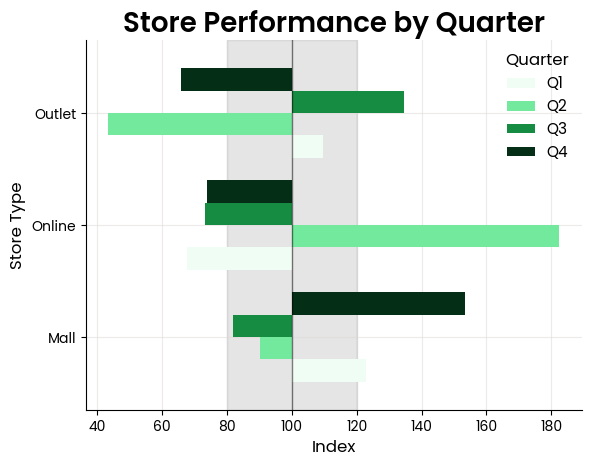

In [ ]:
# Create sample data with multiple quarters
rng = np.random.default_rng(42)
quarterly_data = pd.DataFrame(
    {
        "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 12,
        "store_type": ["Mall", "Outlet", "Online"] * 20,
        "quarter": ["Q1", "Q2", "Q3", "Q4"] * 15,
        "revenue": rng.gamma(2.5, 800, 60),
    },
)

index.plot(
    quarterly_data,
    value_col="revenue",
    group_col="store_type",
    index_col="product_category",
    value_to_index="Electronics",
    series_col="quarter",  # Creates grouped bars for each quarter
    title="Store Performance by Quarter",
    y_label="Store Type",
    legend_title="Quarter",
)
plt.show()

## Different Aggregation Function

Use `agg_func="mean"` instead of the default "sum" to show average performance rather than total performance.

---

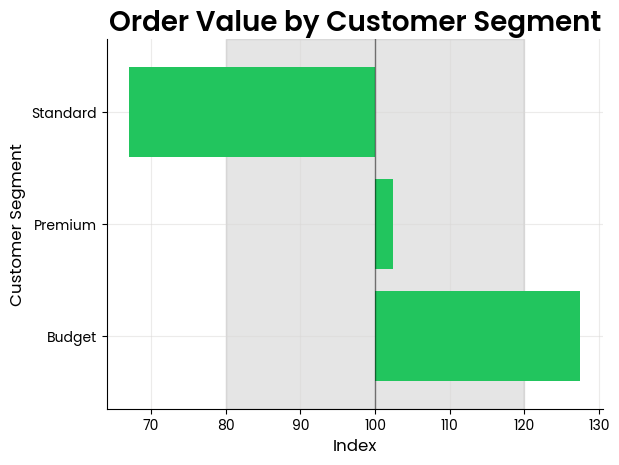

In [ ]:
# Create sample transaction data with multiple transactions per category
rng = np.random.default_rng(42)
transaction_data = pd.DataFrame(
    {
        "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 30,
        "customer_segment": ["Premium", "Standard", "Budget"] * 50,
        "avg_order_value": rng.gamma(1.8, 120, 150),
    },
)

index.plot(
    transaction_data,
    value_col="avg_order_value",
    group_col="customer_segment",
    index_col="product_category",
    value_to_index="Electronics",
    agg_func="mean",  # Use mean instead of sum
    title="Order Value by Customer Segment",
    y_label="Customer Segment",
)
plt.show()

## Value-Based Sorting

Use `sort_by="value"` to sort groups by their index values rather than alphabetically by group name.

---

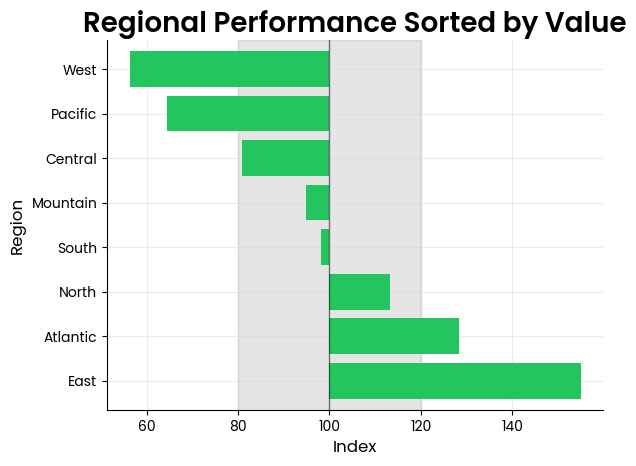

In [ ]:
# Create sample performance data across different regions
rng = np.random.default_rng(42)
performance_data = pd.DataFrame(
    {
        "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 16,
        "region": ["North", "South", "East", "West", "Central", "Mountain", "Pacific", "Atlantic"] * 10,
        "performance_score": rng.gamma(2.2, 50, 80),
    },
)

index.plot(
    performance_data,
    value_col="performance_score",
    group_col="region",
    index_col="product_category",
    value_to_index="Electronics",
    sort_by="value",  # Sort by index values instead of group names
    sort_order="descending",  # Show highest performers first
    title="Regional Performance Sorted by Value",
    y_label="Region",
)
plt.show()

## Custom Highlight Range

Use custom `highlight_range` instead of the default (80, 120) to focus on different performance thresholds.

---

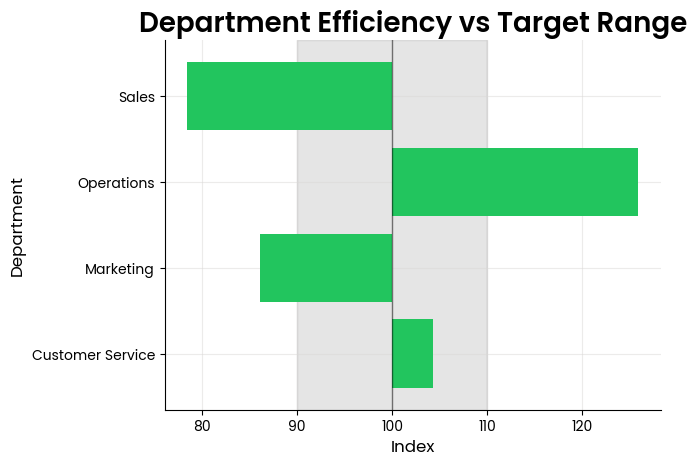

In [ ]:
# Create sample efficiency data
rng = np.random.default_rng(42)
efficiency_data = pd.DataFrame(
    {
        "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 12,
        "department": ["Marketing", "Sales", "Operations", "Customer Service"] * 15,
        "efficiency_metric": rng.gamma(2.0, 85, 60),
    },
)

index.plot(
    efficiency_data,
    value_col="efficiency_metric",
    group_col="department",
    index_col="product_category",
    value_to_index="Electronics",
    highlight_range=(90, 110),  # Tighter range for acceptable performance
    title="Department Efficiency vs Target Range",
    y_label="Department",
)
plt.show()

## Top N Filtering

Use `top_n` parameter to show only the top performing groups, useful for focusing on best performers.

---

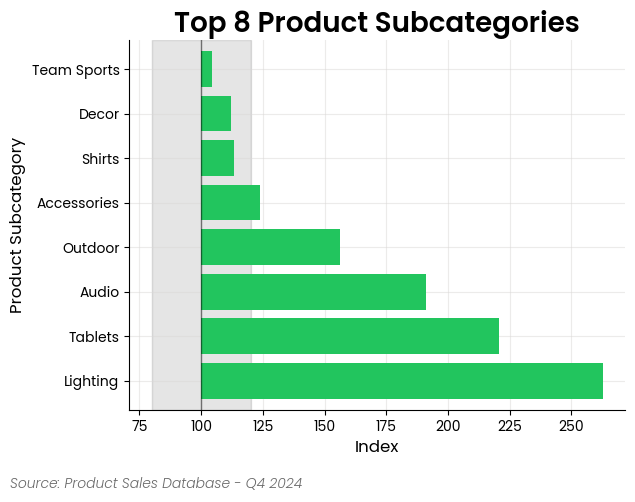

In [ ]:
# Create sample data with many product subcategories
rng = np.random.default_rng(42)
# fmt: off
subcategories = [
    "Smartphones", "Laptops", "Tablets", "Audio", "Cameras", "Gaming",
    "Shirts", "Pants", "Shoes", "Accessories", "Outerwear", "Dresses",
    "Furniture", "Decor", "Kitchen", "Bedding", "Lighting", "Storage",
    "Running", "Gym", "Outdoor", "Team Sports", "Water Sports", "Fitness",
]
# fmt: on

product_data = []
for i in range(120):
    category_idx = i % 5
    subcategory_idx = (i // 5) % len(subcategories)
    category = ["Electronics", "Apparel", "Home", "Sports", "Beauty"][category_idx]
    subcategory = subcategories[subcategory_idx]
    product_data.append(
        {
            "product_category": category,
            "product_subcategory": subcategory,
            "sales_volume": rng.gamma(1.5, 20),
        },
    )

product_data = pd.DataFrame(product_data)

index.plot(
    product_data,
    value_col="sales_volume",
    group_col="product_subcategory",
    index_col="product_category",
    value_to_index="Electronics",
    top_n=8,
    title="Top 8 Product Subcategories",
    y_label="Product Subcategory",
    source_text="Source: Product Sales Database - Q4 2024",
)
plt.show()

## Bottom N Filtering

Use `bottom_n` parameter to show only the bottom performing groups, useful for identifying underperformers.

---

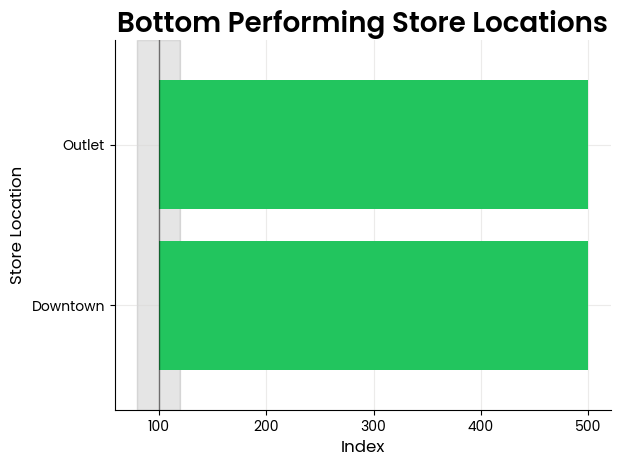

In [ ]:
# Create sample data with varied performance
rng = np.random.default_rng(42)
varied_data = pd.DataFrame(
    {
        "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 20,
        "store_location": [
            "Downtown",
            "Mall",
            "Suburb",
            "Airport",
            "Online",
            "Outlet",
            "Resort",
            "University",
            "Hospital",
            "Stadium",
        ]
        * 10,
        "sales_performance": rng.gamma(1.8, 15),
    },
)

index.plot(
    varied_data,
    value_col="sales_performance",
    group_col="store_location",
    index_col="product_category",
    value_to_index="Electronics",
    bottom_n=2,
    title="Bottom Performing Store Locations",
    y_label="Store Location",
)
plt.show()

## Filter Above/Below Thresholds

Use `filter_above` and `filter_below` to show only groups within specific performance ranges.

---

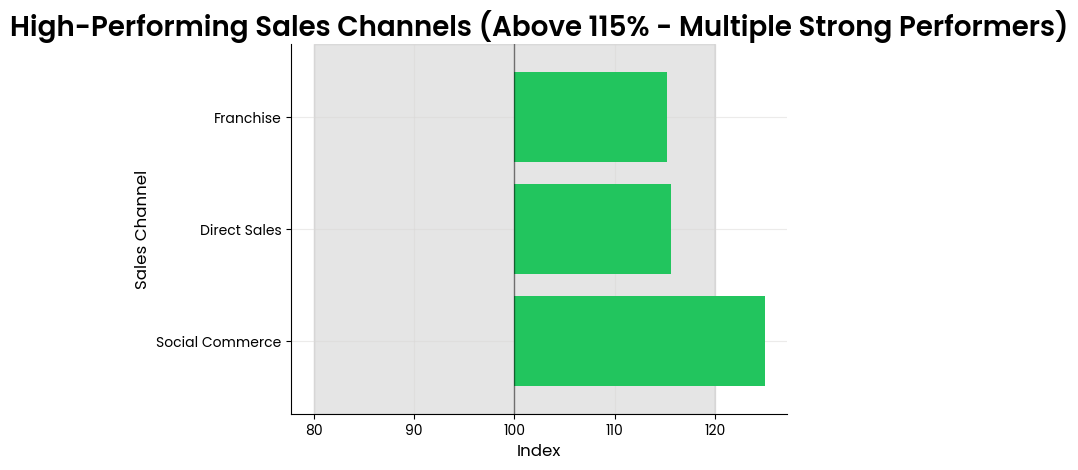

In [ ]:
# Create strategic data to ensure multiple visually interesting bars outside gray area
rng = np.random.default_rng(42)
# fmt: off
threshold_data = pd.DataFrame(
    {
        "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 20,
        "sales_channel": [
            "Direct Sales", "Partner Network", "E-commerce", "Retail Stores",
            "Wholesale", "Franchise", "Mobile App", "Social Commerce",
        ] * 12 + ["Direct Sales", "Partner Network", "E-commerce", "Retail Stores"] * 1,
        "performance_metric": (
            # Electronics (baseline) - moderate consistent performance
            [50, 50, 50, 50, 50, 50, 50, 50] * 2 + [50, 50, 50, 50]
            +
            # Apparel - significantly higher in digital channels
            [75, 60, 120, 55, 45, 70, 110, 80] * 2 + [73, 62, 118, 57]
            +
            # Home - very strong e-commerce and mobile performance
            [85, 65, 140, 60, 50, 80, 135, 90] * 2 + [83, 67, 138, 62]
            +
            # Sports - excellent digital presence
            [90, 70, 130, 65, 55, 85, 125, 95] * 2 + [88, 72, 128, 67]
            +
            # Beauty - outstanding mobile and e-commerce performance
            [80, 60, 150, 55, 45, 75, 145, 85] * 2 + [78, 62, 148, 57]
        ),
    },
)
# fmt: on

index.plot(
    threshold_data,
    value_col="performance_metric",
    group_col="sales_channel",
    index_col="product_category",
    value_to_index="Electronics",
    filter_above=15,
    sort_by="value",
    sort_order="descending",
    title="High-Performing Sales Channels (Above 115% - Multiple Strong Performers)",
    y_label="Sales Channel",
)
plt.show()

## Include Only Specific Groups

Use `include_only_groups` to focus on specific groups of interest.

---

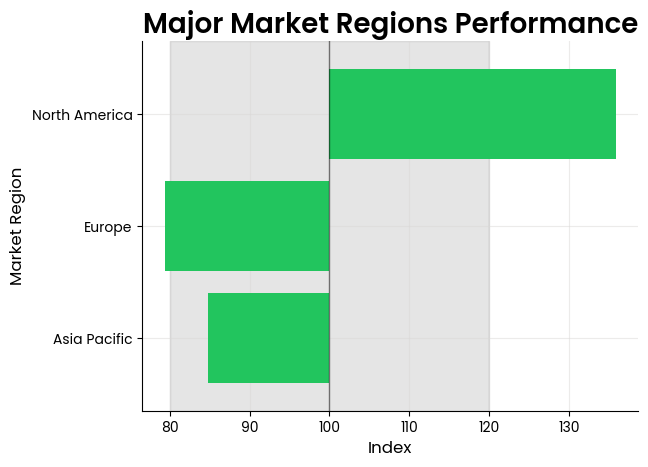

In [ ]:
# Create sample data for focused analysis with varied regional performance
# fmt: off
focus_data = pd.DataFrame(
    {
        "product_category": (
            ["Electronics"] * 18 + ["Apparel"] * 18 + ["Home"] * 18 + ["Sports"] * 18 + ["Beauty"] * 18
        ),
        "market_region": [
            "North America",
            "Europe",
            "Asia Pacific",
            "Latin America",
            "Middle East",
            "Africa",
        ]
        * 15,
        "market_share": (
            # Electronics (baseline) - North America stronger
            [25, 20, 20, 15, 10, 10] * 3
            +
            # Apparel - Europe stronger
            [10, 35, 15, 20, 10, 10] * 3
            +
            # Home - Asia Pacific much stronger
            [15, 15, 45, 10, 10, 5] * 3
            +
            # Sports - North America stronger
            [30, 18, 20, 12, 10, 10] * 3
            +
            # Beauty - Europe stronger
            [12, 38, 18, 15, 10, 7] * 3
        ),
    },
)
# fmt: on

index.plot(
    focus_data,
    value_col="market_share",
    group_col="market_region",
    index_col="product_category",
    value_to_index="Electronics",
    include_only_groups=["North America", "Europe", "Asia Pacific"],
    title="Major Market Regions Performance",
    y_label="Market Region",
)
plt.show()

## Exclude Specific Groups

Use `exclude_groups` to remove specific groups from the analysis, useful for excluding outliers or irrelevant categories.

---

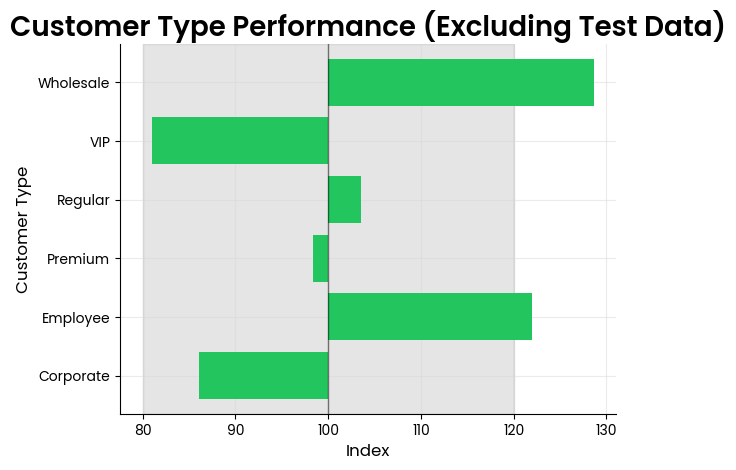

In [ ]:
# Create sample data with some outlier segments
rng = np.random.default_rng(42)
segment_data = pd.DataFrame(
    {
        "product_category": ["Electronics", "Apparel", "Home", "Sports", "Beauty"] * 16,
        "customer_type": [
            "Regular",
            "Premium",
            "VIP",
            "Corporate",
            "Wholesale",
            "Employee",
            "Test",
            "Internal",
        ]
        * 10,
        "revenue_contribution": rng.uniform(10, 30, 80),  # Use uniform for consistent data
    },
)

index.plot(
    segment_data,
    value_col="revenue_contribution",
    group_col="customer_type",
    index_col="product_category",
    value_to_index="Electronics",
    exclude_groups=["Test", "Internal"],
    title="Customer Type Performance (Excluding Test Data)",
    y_label="Customer Type",
)
plt.show()